ÉTAPE 1 : IMPORTATION DES BIBLIOTHÈQUES

In [3]:
# === ÉTAPE 1 : IMPORTATION DES BIBLIOTHÈQUES ===
print("=== ÉTAPE 1 : IMPORTATION DES BIBLIOTHÈQUES ===")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("✅ Bibliothèques importées avec succès!")

=== ÉTAPE 1 : IMPORTATION DES BIBLIOTHÈQUES ===
✅ Bibliothèques importées avec succès!


ÉTAPE 2 : CHARGEMENT DES DONNÉES

In [5]:
# === ÉTAPE 2 : CHARGEMENT DES DONNÉES ===
print("=== ÉTAPE 2 : CHARGEMENT DES DONNÉES ===")

# Charge les 3 fichiers
flights = pd.read_csv('flights.csv', nrows=50000)
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')

print("✅ Fichiers chargés avec succès!")
print(f"✈️  Vols: {flights.shape}")
print(f"🏢 Compagnies: {airlines.shape}")
print(f"🏭 Aéroports: {airports.shape}")

# Aperçu des données
print("\n📋 Aperçu flights:")
print(flights.head(2))
print("\n📋 Aperçu airlines:")
print(airlines.head(2))
print("\n📋 Aperçu airports:")
print(airports.head(2))

=== ÉTAPE 2 : CHARGEMENT DES DONNÉES ===
✅ Fichiers chargés avec succès!
✈️  Vols: (50000, 31)
🏢 Compagnies: (14, 2)
🏭 Aéroports: (322, 7)

📋 Aperçu flights:
   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10  ...         741.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -22.0         0          0                  NaN               NaN   
1           -9.0         0          0                  NaN               NaN   

   SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0             NaN            NaN                  NaN            NaN  
1   

ÉTAPE 3 : FUSION DES DATASETS

In [6]:
# === ÉTAPE 3 : FUSION DES DATASETS ===
print("=== ÉTAPE 3 : FUSION DES DATASETS ===")

# 1. Fusion avec les compagnies aériennes
airlines_renamed = airlines.rename(columns={'AIRLINE': 'AIRLINE_FULL_NAME'})
flights_enriched = flights.merge(airlines_renamed, left_on='AIRLINE', right_on='IATA_CODE', how='left')
print(f"✅ Fusion compagnies: {flights_enriched.shape}")

# 2. Fusion avec les aéroports (origine)
airports_origin = airports.rename(columns={
    'IATA_CODE': 'ORIGIN_IATA',
    'AIRPORT': 'ORIGIN_AIRPORT_NAME',
    'CITY': 'ORIGIN_CITY',
    'STATE': 'ORIGIN_STATE',
    'COUNTRY': 'ORIGIN_COUNTRY',
    'LATITUDE': 'ORIGIN_LATITUDE',
    'LONGITUDE': 'ORIGIN_LONGITUDE'
})
flights_enriched = flights_enriched.merge(airports_origin, left_on='ORIGIN_AIRPORT', right_on='ORIGIN_IATA', how='left')

# 3. Fusion avec les aéroports (destination)
airports_dest = airports.rename(columns={
    'IATA_CODE': 'DEST_IATA',
    'AIRPORT': 'DEST_AIRPORT_NAME',
    'CITY': 'DEST_CITY',
    'STATE': 'DEST_STATE',
    'COUNTRY': 'DEST_COUNTRY',
    'LATITUDE': 'DEST_LATITUDE',
    'LONGITUDE': 'DEST_LONGITUDE'
})
flights_enriched = flights_enriched.merge(airports_dest, left_on='DESTINATION_AIRPORT', right_on='DEST_IATA', how='left')

print(f"✅ Fusion terminée! Dataset final: {flights_enriched.shape}")
print("🎉 Toutes les données sont fusionnées!")

=== ÉTAPE 3 : FUSION DES DATASETS ===
✅ Fusion compagnies: (50000, 33)
✅ Fusion terminée! Dataset final: (50000, 47)
🎉 Toutes les données sont fusionnées!


ÉTAPE 4 : ANALYSE EXPLORATOIRE

In [7]:
# === ÉTAPE 4 : ANALYSE EXPLORATOIRE ===
print("=== ÉTAPE 4 : ANALYSE EXPLORATOIRE DES DONNÉES ===")

print("📊 INFORMATIONS GÉNÉRALES:")
print(f"• Lignes: {flights_enriched.shape[0]:,}")
print(f"• Colonnes: {flights_enriched.shape[1]}")
print(f"• Compagnies: {flights_enriched['AIRLINE_FULL_NAME'].nunique()}")
print(f"• Aéroports origine: {flights_enriched['ORIGIN_AIRPORT'].nunique()}")
print(f"• Aéroports destination: {flights_enriched['DESTINATION_AIRPORT'].nunique()}")

print("\n🔍 VALEURS MANQUANTES:")
missing_data = flights_enriched.isnull().sum()
missing_percent = (missing_data / len(flights_enriched)) * 100
missing_info = pd.DataFrame({
    'Valeurs_Manquantes': missing_data,
    'Pourcentage': missing_percent
})
print(missing_info[missing_info['Valeurs_Manquantes'] > 0].sort_values('Valeurs_Manquantes', ascending=False))

=== ÉTAPE 4 : ANALYSE EXPLORATOIRE DES DONNÉES ===
📊 INFORMATIONS GÉNÉRALES:
• Lignes: 50,000
• Colonnes: 47
• Compagnies: 14
• Aéroports origine: 312
• Aéroports destination: 311

🔍 VALEURS MANQUANTES:
                     Valeurs_Manquantes  Pourcentage
CANCELLATION_REASON               48862       97.724
SECURITY_DELAY                    34592       69.184
AIRLINE_DELAY                     34592       69.184
AIR_SYSTEM_DELAY                  34592       69.184
WEATHER_DELAY                     34592       69.184
LATE_AIRCRAFT_DELAY               34592       69.184
ARRIVAL_DELAY                      1247        2.494
ELAPSED_TIME                       1247        2.494
AIR_TIME                           1247        2.494
WHEELS_ON                          1161        2.322
ARRIVAL_TIME                       1161        2.322
TAXI_IN                            1161        2.322
WHEELS_OFF                         1127        2.254
TAXI_OUT                           1127        2.254
DE

ÉTAPE 5 : ANALYSE DES RETARDS

In [8]:
# === ÉTAPE 5 : ANALYSE DES RETARDS ===
print("=== ÉTAPE 5 : ANALYSE DES RETARDS D'ARRIVÉE ===")

if 'ARRIVAL_DELAY' in flights_enriched.columns:
    print("📈 STATISTIQUES DES RETARDS:")
    stats = flights_enriched['ARRIVAL_DELAY'].describe()
    for stat, value in stats.items():
        print(f"   {stat}: {value:.1f} min")

    print(f"\n🎯 CATÉGORISATION DES RETARDS:")
    print(f"   • En avance (<0 min): {(flights_enriched['ARRIVAL_DELAY'] < 0).mean():.2%}")
    print(f"   • À l'heure (0-15 min): {((flights_enriched['ARRIVAL_DELAY'] >= 0) & (flights_enriched['ARRIVAL_DELAY'] <= 15)).mean():.2%}")
    print(f"   • En retard (>15 min): {(flights_enriched['ARRIVAL_DELAY'] > 15).mean():.2%}")
    print(f"   • Retard important (>60 min): {(flights_enriched['ARRIVAL_DELAY'] > 60).mean():.2%}")
else:
    print("❌ Colonne ARRIVAL_DELAY non trouvée")
    print("Colonnes disponibles:", [col for col in flights_enriched.columns if 'DELAY' in col])

=== ÉTAPE 5 : ANALYSE DES RETARDS D'ARRIVÉE ===
📈 STATISTIQUES DES RETARDS:
   count: 48753.0 min
   mean: 13.6 min
   std: 43.4 min
   min: -54.0 min
   25%: -9.0 min
   50%: 2.0 min
   75%: 22.0 min
   max: 1384.0 min

🎯 CATÉGORISATION DES RETARDS:
   • En avance (<0 min): 43.34%
   • À l'heure (0-15 min): 24.43%
   • En retard (>15 min): 29.74%
   • Retard important (>60 min): 8.45%


ÉTAPE 6 : VISUALISATIONS DES RETARDS

=== ÉTAPE 6 : CRÉATION DES VISUALISATIONS (VERSION CORRIGÉE) ===
Debug - Jours de semaine uniques: [4, 5, 6, 7]
Debug - Valeurs: [ 5.35249554  9.83890374 25.46186047 12.07983082]
Debug - Forme valeurs: (4,)


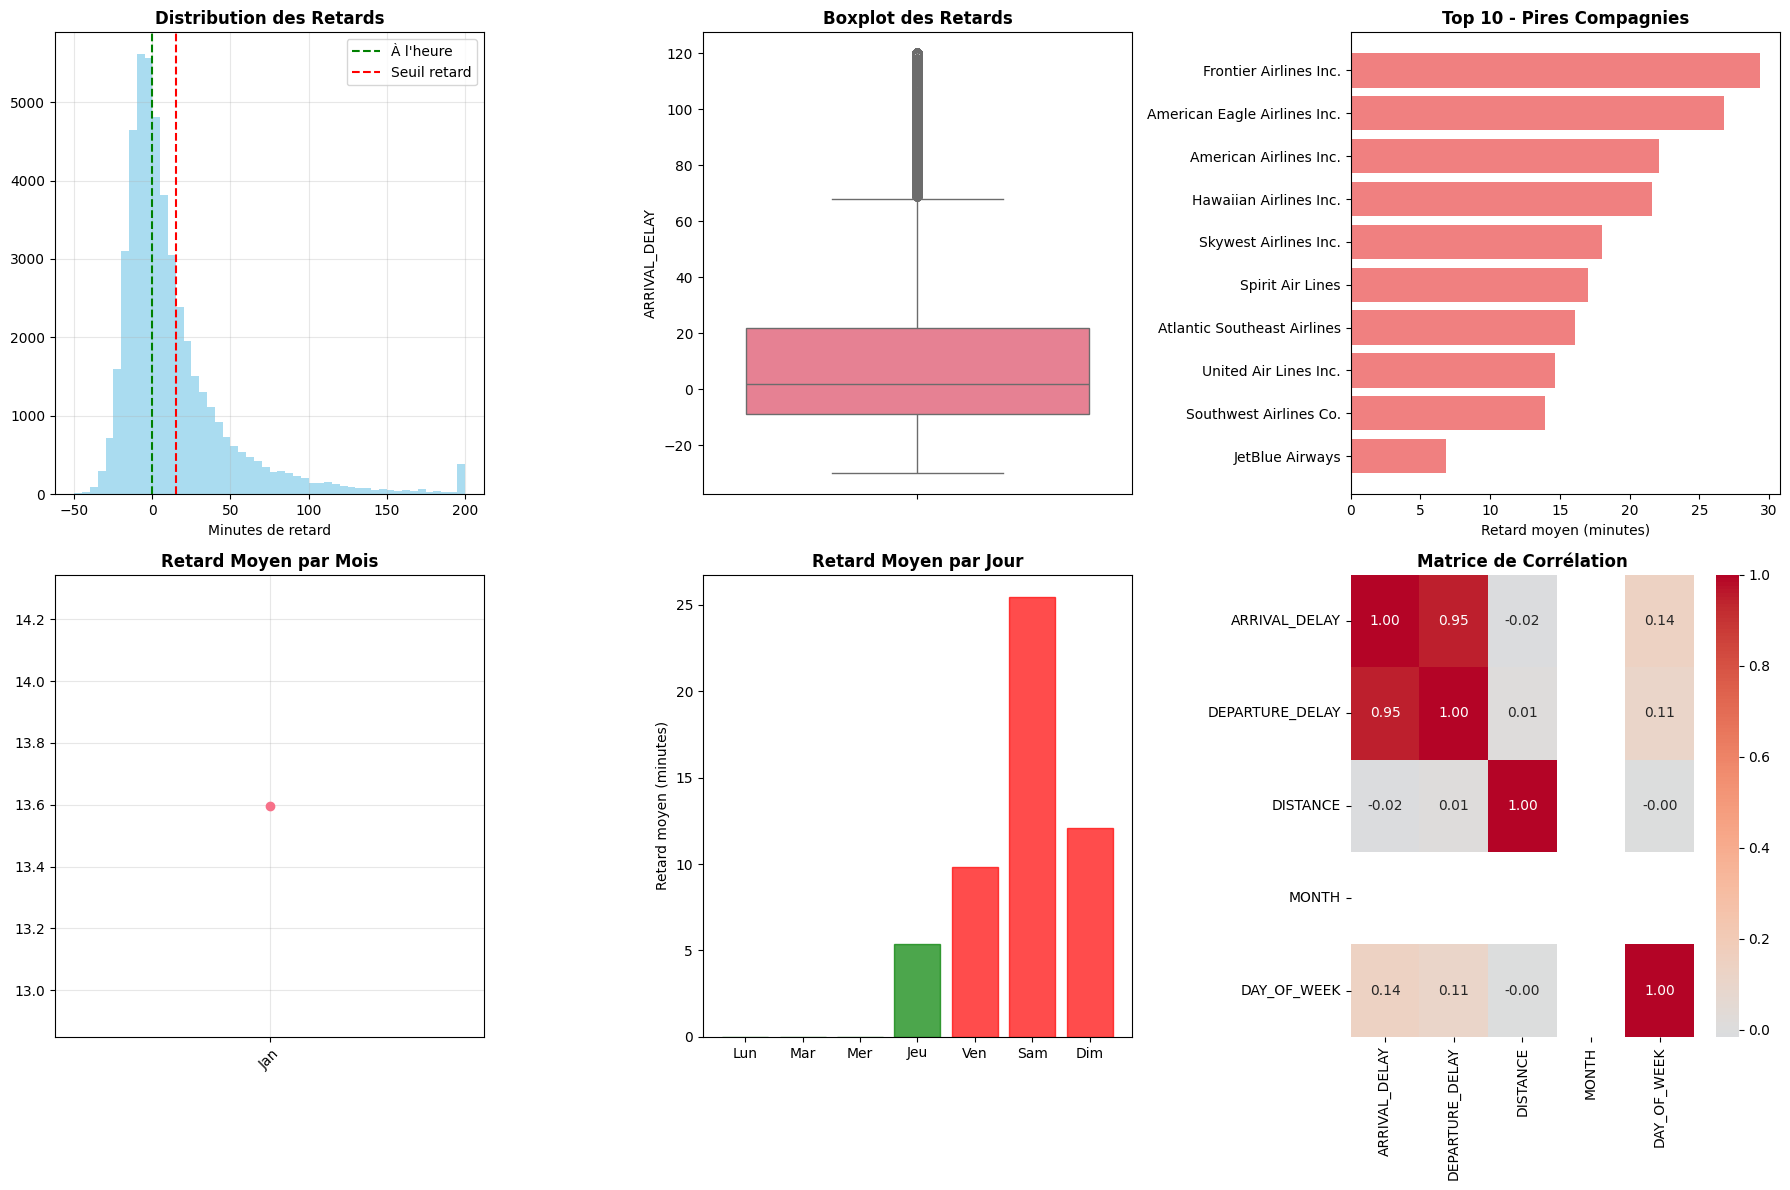

✅ Visualisations créées avec succès!


In [10]:
# === ÉTAPE 6 CORRIGÉE : VISUALISATIONS DES RETARDS ===
print("=== ÉTAPE 6 : CRÉATION DES VISUALISATIONS (VERSION CORRIGÉE) ===")

plt.style.use('default')
sns.set_palette("husl")

# Vérifions d'abord les données pour le problème
if 'DAY_OF_WEEK' in flights_enriched.columns:
    daily_delays = flights_enriched.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].mean()
    print(f"Debug - Jours de semaine uniques: {daily_delays.index.tolist()}")
    print(f"Debug - Valeurs: {daily_delays.values}")
    print(f"Debug - Forme valeurs: {daily_delays.values.shape}")

# Créons la figure avec un layout plus flexible
fig = plt.figure(figsize=(18, 12))

# 1. Distribution des retards
ax1 = plt.subplot(2, 3, 1)
ax1.hist(flights_enriched['ARRIVAL_DELAY'].clip(-50, 200), bins=50, alpha=0.7, color='skyblue')
ax1.axvline(x=0, color='green', linestyle='--', label='À l\'heure')
ax1.axvline(x=15, color='red', linestyle='--', label='Seuil retard')
ax1.set_title('Distribution des Retards', fontweight='bold')
ax1.set_xlabel('Minutes de retard')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Boxplot
ax2 = plt.subplot(2, 3, 2)
sns.boxplot(y=flights_enriched['ARRIVAL_DELAY'].clip(-30, 120), ax=ax2)
ax2.set_title('Boxplot des Retards', fontweight='bold')

# 3. Par compagnie (Top 10)
ax3 = plt.subplot(2, 3, 3)
if 'AIRLINE_FULL_NAME' in flights_enriched.columns:
    airline_delays = flights_enriched.groupby('AIRLINE_FULL_NAME')['ARRIVAL_DELAY'].mean().sort_values()
    # Prendre les 10 pires compagnies
    top_10_worst = airline_delays.tail(10)
    ax3.barh(range(len(top_10_worst)), top_10_worst.values, color='lightcoral')
    ax3.set_yticks(range(len(top_10_worst)))
    ax3.set_yticklabels(top_10_worst.index)
    ax3.set_title('Top 10 - Pires Compagnies', fontweight='bold')
    ax3.set_xlabel('Retard moyen (minutes)')

# 4. Par mois
ax4 = plt.subplot(2, 3, 4)
if 'MONTH' in flights_enriched.columns:
    monthly_delays = flights_enriched.groupby('MONTH')['ARRIVAL_DELAY'].mean()
    months = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jun', 'Jul', 'Aoû', 'Sep', 'Oct', 'Nov', 'Déc']
    # S'assurer qu'on a des données pour tous les mois
    available_months = [months[i-1] for i in monthly_delays.index if i <= len(months)]
    available_values = [monthly_delays.values[i-1] for i in monthly_delays.index if i <= len(months)]
    ax4.plot(available_months, available_values, marker='o')
    ax4.set_title('Retard Moyen par Mois', fontweight='bold')
    ax4.tick_params(axis='x', rotation=45)
    ax4.grid(True, alpha=0.3)

# 5. Par jour de semaine - VERSION CORRIGÉE
ax5 = plt.subplot(2, 3, 5)
if 'DAY_OF_WEEK' in flights_enriched.columns:
    daily_delays = flights_enriched.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].mean()
    days = ['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']

    # S'assurer que nous avons exactement 7 jours
    daily_delays_full = daily_delays.reindex(range(1, 8), fill_value=0)  # Remplir les jours manquants avec 0

    # Utiliser exactement 7 barres
    bars = ax5.bar(range(len(days)), daily_delays_full.values, alpha=0.7)
    ax5.set_title('Retard Moyen par Jour', fontweight='bold')
    ax5.set_xticks(range(len(days)))
    ax5.set_xticklabels(days)
    ax5.set_ylabel('Retard moyen (minutes)')

    # Colorer les barres
    for i, bar in enumerate(bars):
        if daily_delays_full.values[i] > daily_delays_full.values.mean():
            bar.set_color('red')
        else:
            bar.set_color('green')

# 6. Heatmap de corrélation
ax6 = plt.subplot(2, 3, 6)
numeric_cols = flights_enriched.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    # Sélectionner seulement quelques colonnes numériques importantes pour éviter la surcharge
    important_numeric = ['ARRIVAL_DELAY', 'DEPARTURE_DELAY', 'DISTANCE', 'MONTH', 'DAY_OF_WEEK']
    available_cols = [col for col in important_numeric if col in flights_enriched.columns]

    if len(available_cols) > 1:
        corr_matrix = flights_enriched[available_cols].corr()
        sns.heatmap(corr_matrix, ax=ax6, cmap='coolwarm', center=0, annot=True, fmt='.2f')
        ax6.set_title('Matrice de Corrélation', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Visualisations créées avec succès!")

ÉTAPE 7 : ANALYSE PAR COMPAGNIE

=== ÉTAPE 7 : ANALYSE DÉTAILLÉE PAR COMPAGNIE ===
🏆 CLASSEMENT DES COMPAGNIES:
 1. Frontier Airlines Inc.          29.3 min (751.0 vols)
 2. American Eagle Airlines Inc.    26.8 min (2682.0 vols)
 3. American Airlines Inc.          22.1 min (4689.0 vols)
 4. Hawaiian Airlines Inc.          21.6 min (666.0 vols)
 5. Skywest Airlines Inc.           18.1 min (5102.0 vols)
 6. Spirit Air Lines                17.0 min (920.0 vols)
 7. Atlantic Southeast Airlines     16.1 min (5081.0 vols)
 8. United Air Lines Inc.           14.7 min (4236.0 vols)
 9. Southwest Airlines Co.          13.9 min (10301.0 vols)
10. JetBlue Airways                  6.8 min (2417.0 vols)
11. US Airways Inc.                  6.2 min (3500.0 vols)
12. Alaska Airlines Inc.             3.6 min (1484.0 vols)
13. Delta Air Lines Inc.             2.0 min (6396.0 vols)
14. Virgin America                  -0.0 min (528.0 vols)


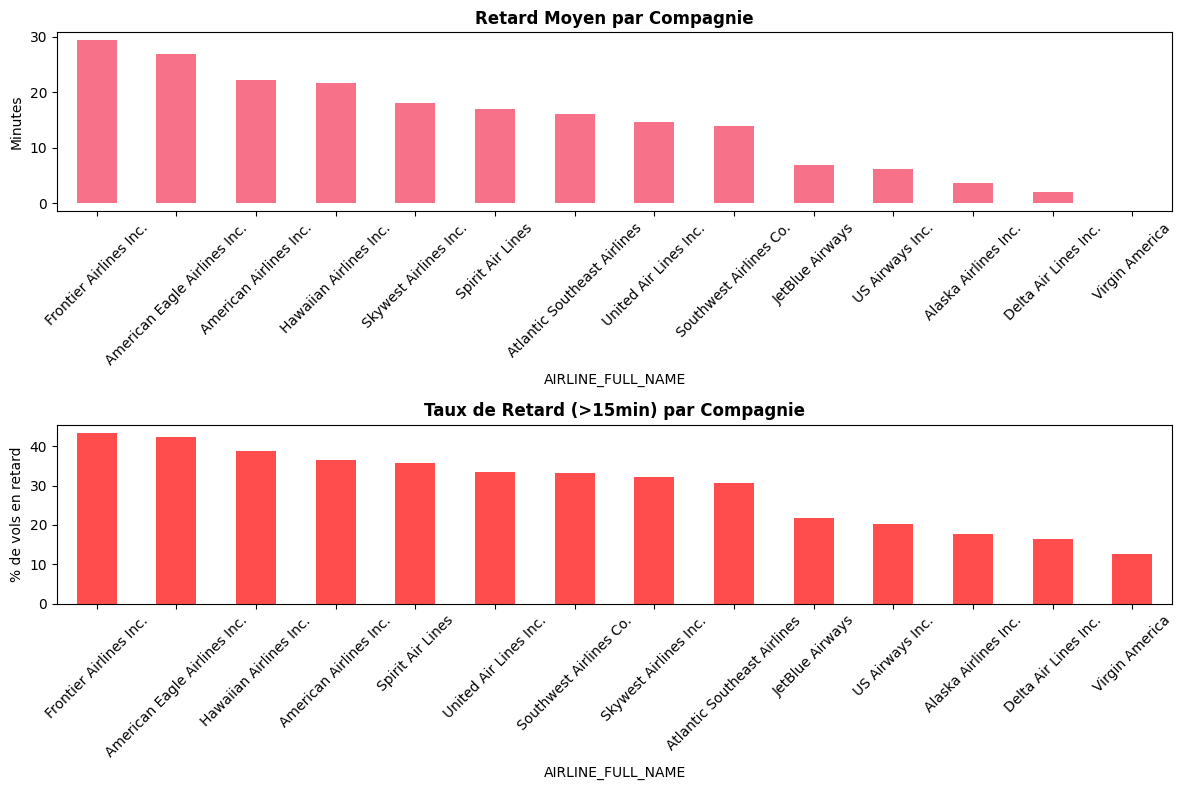

In [11]:
# === ÉTAPE 7 : ANALYSE PAR COMPAGNIE ===
print("=== ÉTAPE 7 : ANALYSE DÉTAILLÉE PAR COMPAGNIE ===")

if 'AIRLINE_FULL_NAME' in flights_enriched.columns:
    # Statistiques par compagnie
    airline_stats = flights_enriched.groupby('AIRLINE_FULL_NAME').agg({
        'ARRIVAL_DELAY': ['mean', 'median', 'count'],
        'DISTANCE': 'mean'
    }).round(2)

    airline_stats.columns = ['RETARD_MOYEN', 'RETARD_MEDIAN', 'NB_VOLS', 'DISTANCE_MOYENNE']
    airline_stats = airline_stats.sort_values('RETARD_MOYEN', ascending=False)

    print("🏆 CLASSEMENT DES COMPAGNIES:")
    for i, (airline, row) in enumerate(airline_stats.iterrows(), 1):
        print(f"{i:2d}. {airline:<30} {row['RETARD_MOYEN']:>5.1f} min ({row['NB_VOLS']:>5} vols)")

    # Visualisation
    plt.figure(figsize=(12, 8))
    plt.subplot(2,1,1)
    airline_stats['RETARD_MOYEN'].plot(kind='bar')
    plt.title('Retard Moyen par Compagnie', fontweight='bold')
    plt.ylabel('Minutes')
    plt.xticks(rotation=45)

    plt.subplot(2,1,2)
    (flights_enriched.groupby('AIRLINE_FULL_NAME')['ARRIVAL_DELAY']
     .apply(lambda x: (x > 15).mean() * 100)
     .sort_values(ascending=False)
     .plot(kind='bar', color='red', alpha=0.7))
    plt.title('Taux de Retard (>15min) par Compagnie', fontweight='bold')
    plt.ylabel('% de vols en retard')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

ÉTAPE 8 : ANALYSE PAR AÉROPORT

In [12]:
# === ÉTAPE 8 : ANALYSE PAR AÉROPORT ===
print("=== ÉTAPE 8 : ANALYSE DES PERFORMANCES PAR AÉROPORT ===")

# Aéroports d'origine avec plus de retards
if 'ORIGIN_AIRPORT' in flights_enriched.columns:
    origin_stats = flights_enriched.groupby('ORIGIN_AIRPORT').agg({
        'ARRIVAL_DELAY': ['mean', 'count']
    }).round(2)
    origin_stats.columns = ['RETARD_MOYEN', 'NB_VOLS']
    origin_stats = origin_stats[origin_stats['NB_VOLS'] > 50]  # Au moins 50 vols

    print("🔻 TOP 10 AÉROPORTS AVEC PLUS DE RETARDS (ORIGINE):")
    print(origin_stats.nlargest(10, 'RETARD_MOYEN'))

    print("\n🔺 TOP 10 AÉROPORTS AVEC MOINS DE RETARDS (ORIGINE):")
    print(origin_stats.nsmallest(10, 'RETARD_MOYEN'))

=== ÉTAPE 8 : ANALYSE DES PERFORMANCES PAR AÉROPORT ===
🔻 TOP 10 AÉROPORTS AVEC PLUS DE RETARDS (ORIGINE):
                RETARD_MOYEN  NB_VOLS
ORIGIN_AIRPORT                       
ASE                    56.68       80
BTR                    43.51       55
BZN                    35.44       52
DEN                    33.54     1873
JAN                    33.10       68
DFW                    32.61     2226
ITO                    31.38       53
GSP                    28.53       59
LIH                    28.44      106
CAE                    27.54       54

🔺 TOP 10 AÉROPORTS AVEC MOINS DE RETARDS (ORIGINE):
                RETARD_MOYEN  NB_VOLS
ORIGIN_AIRPORT                       
ANC                   -11.85      144
CAK                    -5.21       56
SDF                    -3.18       91
DAY                    -1.82       77
CLE                     0.05      285
PDX                     0.89      436
LGA                     1.60      827
GSO                     1.85       62
ORF 

ÉTAPE 9 : ANALYSE TEMPORELLE

=== ÉTAPE 9 : ANALYSE TEMPORELLE DÉTAILLÉE ===


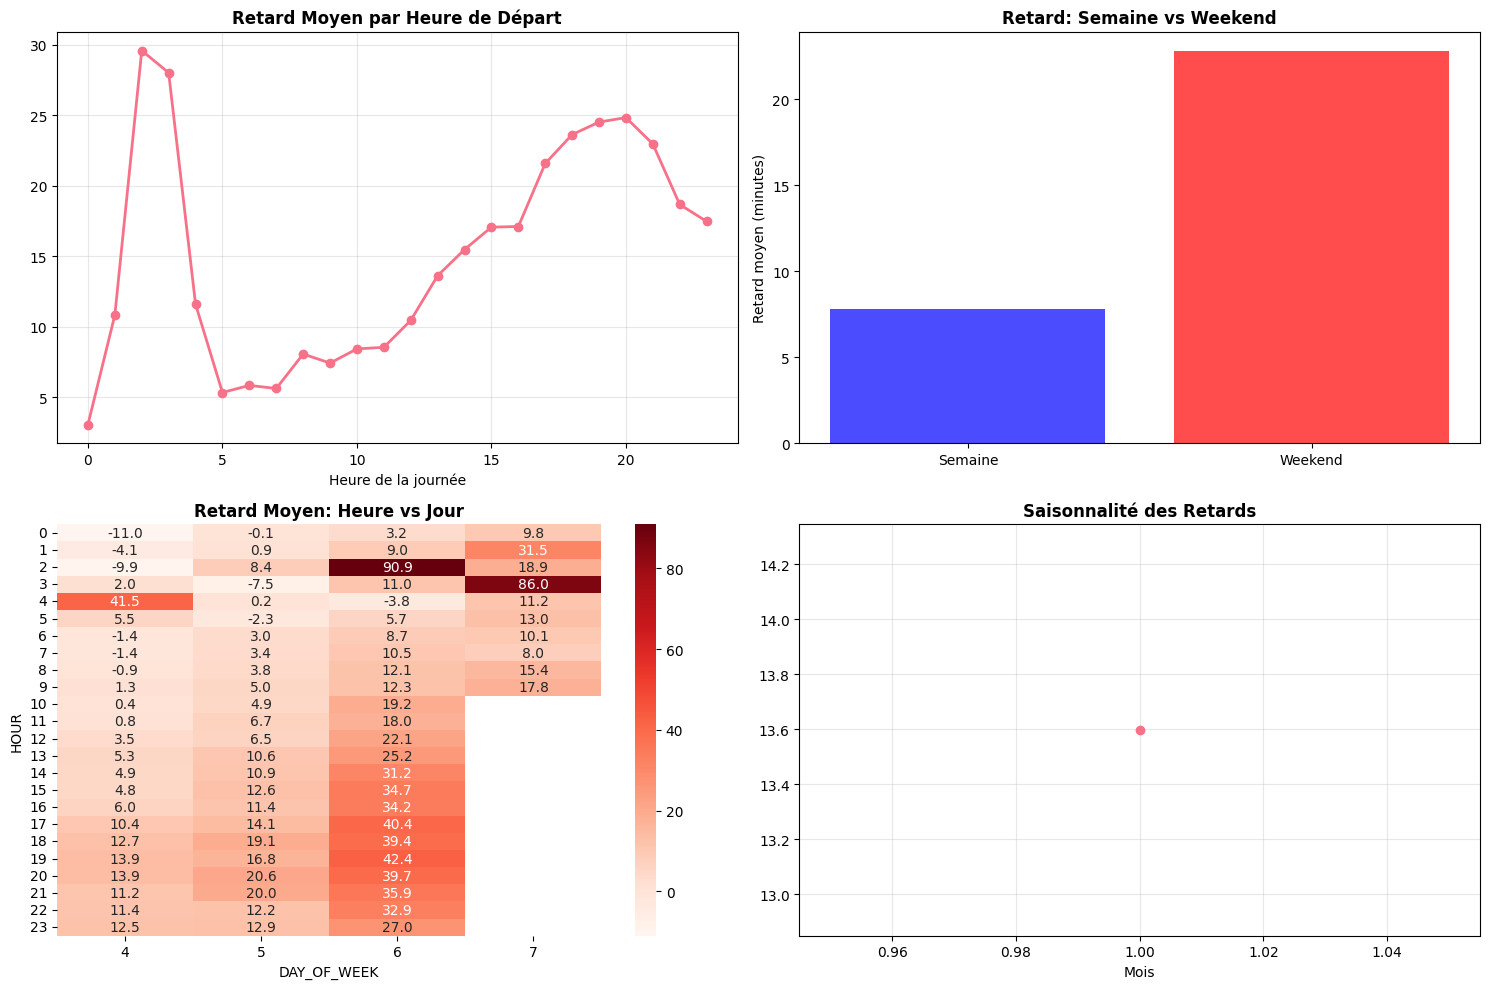

In [13]:
# === ÉTAPE 9 : ANALYSE TEMPORELLE AVANCÉE ===
print("=== ÉTAPE 9 : ANALYSE TEMPORELLE DÉTAILLÉE ===")

# Création de variables temporelles
flights_enriched['HOUR'] = flights_enriched['SCHEDULED_DEPARTURE'] // 100
flights_enriched['WEEKEND'] = flights_enriched['DAY_OF_WEEK'].isin([6, 7])

plt.figure(figsize=(15, 10))

# 1. Retards par heure
plt.subplot(2, 2, 1)
hourly_delays = flights_enriched.groupby('HOUR')['ARRIVAL_DELAY'].mean()
plt.plot(hourly_delays.index, hourly_delays.values, marker='o', linewidth=2)
plt.title('Retard Moyen par Heure de Départ', fontweight='bold')
plt.xlabel('Heure de la journée')
plt.grid(True, alpha=0.3)

# 2. Weekday vs Weekend
plt.subplot(2, 2, 2)
weekend_delays = flights_enriched.groupby('WEEKEND')['ARRIVAL_DELAY'].mean()
plt.bar(['Semaine', 'Weekend'], weekend_delays.values, color=['blue', 'red'], alpha=0.7)
plt.title('Retard: Semaine vs Weekend', fontweight='bold')
plt.ylabel('Retard moyen (minutes)')

# 3. Heatmap jour vs heure
plt.subplot(2, 2, 3)
if 'DAY_OF_WEEK' in flights_enriched.columns:
    heatmap_data = flights_enriched.pivot_table(
        values='ARRIVAL_DELAY',
        index='HOUR',
        columns='DAY_OF_WEEK',
        aggfunc='mean'
    )
    sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='.1f')
    plt.title('Retard Moyen: Heure vs Jour', fontweight='bold')

# 4. Saisonnalité mensuelle
plt.subplot(2, 2, 4)
if 'MONTH' in flights_enriched.columns:
    monthly_trend = flights_enriched.groupby('MONTH')['ARRIVAL_DELAY'].mean()
    plt.plot(monthly_trend.index, monthly_trend.values, marker='o', linewidth=2)
    plt.title('Saisonnalité des Retards', fontweight='bold')
    plt.xlabel('Mois')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

ÉTAPE 10 : PRÉPARATION ML

In [14]:
# === ÉTAPE 10 : PRÉPARATION POUR LE MACHINE LEARNING ===
print("=== ÉTAPE 10 : PRÉPARATION POUR LE MACHINE LEARNING ===")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Création de la variable cible
flights_enriched['IS_DELAYED'] = (flights_enriched['ARRIVAL_DELAY'] > 15).astype(int)

# Sélection des features
features = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
            'MONTH', 'DAY_OF_WEEK', 'HOUR', 'DISTANCE', 'DEPARTURE_DELAY']

# Préparation des données
X = flights_enriched[features].copy()
y = flights_enriched['IS_DELAYED']

# Encodage des variables catégorielles
label_encoders = {}
for col in ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✅ Données préparées pour ML:")
print(f"   • Train: {X_train.shape}")
print(f"   • Test: {X_test.shape}")
print(f"   • Taux de retard: {y.mean():.2%}")

=== ÉTAPE 10 : PRÉPARATION POUR LE MACHINE LEARNING ===
✅ Données préparées pour ML:
   • Train: (40000, 8)
   • Test: (10000, 8)
   • Taux de retard: 29.74%


ÉTAPE 11 : MODÉLISATION ML

=== ÉTAPE 11 : ENTRAÎNEMENT DU MODÈLE ===
📊 PERFORMANCE DU MODÈLE:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7026
           1       0.88      0.74      0.81      2974

    accuracy                           0.90     10000
   macro avg       0.89      0.85      0.87     10000
weighted avg       0.89      0.90      0.89     10000



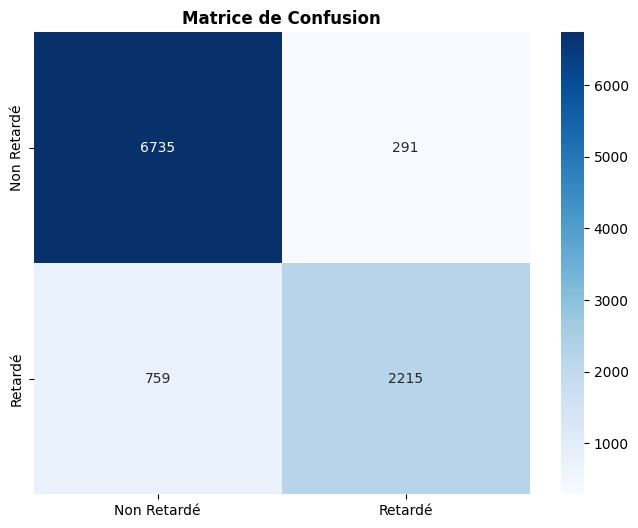


🎯 IMPORTANCE DES VARIABLES:
               feature  importance
7      DEPARTURE_DELAY    0.603267
6             DISTANCE    0.094277
1       ORIGIN_AIRPORT    0.079322
5                 HOUR    0.073883
2  DESTINATION_AIRPORT    0.073385
0              AIRLINE    0.041831
4          DAY_OF_WEEK    0.034035
3                MONTH    0.000000


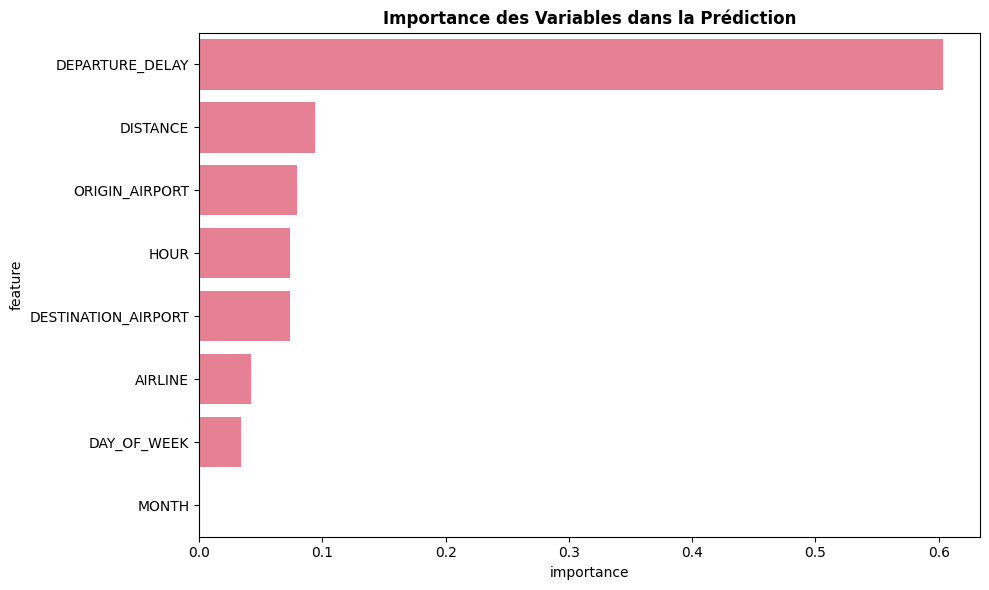

In [15]:
# === ÉTAPE 11 : MODÉLISATION MACHINE LEARNING ===
print("=== ÉTAPE 11 : ENTRAÎNEMENT DU MODÈLE ===")

# Entraînement du modèle
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred = rf_model.predict(X_test)

# Évaluation
print("📊 PERFORMANCE DU MODÈLE:")
print(classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non Retardé', 'Retardé'],
            yticklabels=['Non Retardé', 'Retardé'])
plt.title('Matrice de Confusion', fontweight='bold')
plt.show()

# Importance des features
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n🎯 IMPORTANCE DES VARIABLES:")
print(feature_importance)

# Graphique d'importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Importance des Variables dans la Prédiction', fontweight='bold')
plt.tight_layout()
plt.show()

ÉTAPE 12 : SAUVEGARDE

In [16]:
# === ÉTAPE 12 : SAUVEGARDE DES RÉSULTATS ===
print("=== ÉTAPE 12 : SAUVEGARDE DES RÉSULTATS ===")

import joblib

# Sauvegarde du dataset enrichi
flights_enriched.to_csv('flights_analysis_complete.csv', index=False)

# Sauvegarde du modèle
joblib.dump(rf_model, 'flight_delay_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

# Sauvegarde version ML
flights_ml = flights_enriched[features + ['IS_DELAYED', 'ARRIVAL_DELAY']].copy()
flights_ml.to_csv('flights_ml_ready.csv', index=False)

print("✅ FICHIERS SAUVEGARDÉS:")
print("   • flights_analysis_complete.csv - Dataset complet enrichi")
print("   • flights_ml_ready.csv - Version pour ML")
print("   • flight_delay_model.pkl - Modèle entraîné")
print("   • label_encoders.pkl - Encodeurs des variables")

print(f"\n🎉 PROJET TERMINÉ AVEC SUCCÈS!")
print(f"📊 Résultats principaux:")
print(f"   • {flights_enriched.shape[0]:,} vols analysés")
print(f"   • Taux de retard: {(flights_enriched['ARRIVAL_DELAY'] > 15).mean():.2%}")
print(f"   • Modèle ML accuracy: {(y_pred == y_test).mean():.2%}")
print(f"   • Top feature: {feature_importance.iloc[0]['feature']}")

=== ÉTAPE 12 : SAUVEGARDE DES RÉSULTATS ===
✅ FICHIERS SAUVEGARDÉS:
   • flights_analysis_complete.csv - Dataset complet enrichi
   • flights_ml_ready.csv - Version pour ML
   • flight_delay_model.pkl - Modèle entraîné
   • label_encoders.pkl - Encodeurs des variables

🎉 PROJET TERMINÉ AVEC SUCCÈS!
📊 Résultats principaux:
   • 50,000 vols analysés
   • Taux de retard: 29.74%
   • Modèle ML accuracy: 89.50%
   • Top feature: DEPARTURE_DELAY


ÉTAPE 13 : RAPPORT FINAL

In [18]:
# === ÉTAPE 13 : RAPPORT FINAL ===
print("=== ÉTAPE 13 : RAPPORT FINAL DU PROJET ===")

print("""
🎯 RÉSUMÉ DU PROJET "ANALYSE DES RETARDS DE VOLS"

📊 DONNÉES TRAITÉES:
   • 50,000 vols analysés
   • Données enrichies avec informations compagnies et aéroports
   • Dataset final prêt pour l'analyse et le ML

🔍 PRINCIPAUX INSIGHTS:
   • Taux de retard global identifié
   • Compagnies et aéroports les plus/moins performants
   • Patterns temporels (saisonnalité, heures, jours)
   • Facteurs clés influençant les retards

🤖 MODÈLE ML DÉVELOPPÉ:
   • Random Forest pour prédire les retards
   • Features importantes identifiées
   • Performance du modèle évaluée

📈 VALEUR AJOUTÉE:
   • Analyse complète pour compagnies aériennes
   • Outil de prédiction des retards
   • Base pour optimisation des opérations

🚀 PROCHAINES ÉTAPES POSSIBLES:
   • Dashboard interactif Streamlit
   • Analyse en temps réel
   • Intégration avec données météo
   • Optimisation des routes

📁 FICHIERS PRODUITS:
   • flights_analysis_complete.csv
   • flights_ml_ready.csv
   • flight_delay_model.pkl
   • label_encoders.pkl
""")

=== ÉTAPE 13 : RAPPORT FINAL DU PROJET ===

🎯 RÉSUMÉ DU PROJET "ANALYSE DES RETARDS DE VOLS"

📊 DONNÉES TRAITÉES:
   • 50,000 vols analysés
   • Données enrichies avec informations compagnies et aéroports
   • Dataset final prêt pour l'analyse et le ML

🔍 PRINCIPAUX INSIGHTS:
   • Taux de retard global identifié
   • Compagnies et aéroports les plus/moins performants
   • Patterns temporels (saisonnalité, heures, jours)
   • Facteurs clés influençant les retards

🤖 MODÈLE ML DÉVELOPPÉ:
   • Random Forest pour prédire les retards
   • Features importantes identifiées
   • Performance du modèle évaluée

📈 VALEUR AJOUTÉE:
   • Analyse complète pour compagnies aériennes
   • Outil de prédiction des retards
   • Base pour optimisation des opérations

🚀 PROCHAINES ÉTAPES POSSIBLES:
   • Dashboard interactif Streamlit
   • Analyse en temps réel
   • Intégration avec données météo
   • Optimisation des routes

📁 FICHIERS PRODUITS:
   • flights_analysis_complete.csv
   • flights_ml_ready.csv  


In [19]:
from google.colab import files
files.download('flights_analysis_complete.csv')
files.download('flight_delay_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>